# Avacado Project

## Description

**Problem Statement:**

Avocado is a fruit consumed by people heavily in the United States. 

**Content:**
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Importing Required Libraries

In [58]:
import pandas as pd
import numpy as np

#for plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split

#for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [59]:
df=pd.read_csv('avacado.csv')

In [60]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [61]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

**Date** - The date of the observation

**AveragePrice** - the average price of a single avocado

**type** - conventional or organic

**year** - the year

**Region** - the city or region of the observation

**Total Volume** - Total number of avocados sold

**4046** - Total number of avocados with PLU 4046 sold

**4225** - Total number of avocados with PLU 4225 sold

**4770** - Total number of avocados with PLU 4770 sold


In [63]:
#checking dimensions of dataset
df.shape

(16468, 14)

we have **16468** rows including null value and **14** columns including target variable

In [64]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [65]:
#checkig Data types
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

Here we observe that 3 object types and 11 float type columns.

### Checking and Treating missing values

In [66]:
#checking null values
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

There are 14951 null values in each column.

In [67]:
#Let's drop all the unnecessary rows and columns

df.dropna(how='all',inplace=True)

In [68]:
#checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

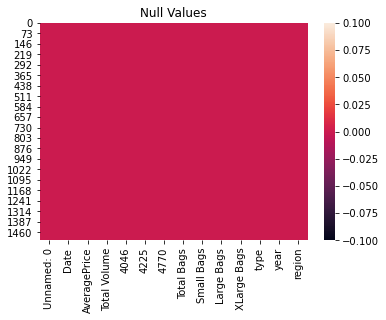

In [69]:
#heatmap for null values
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Null values had been removed.

In [70]:
#dropping Unnamed:0 and year which have no impact on average sales
df.drop(['Unnamed: 0','year'],axis=1,inplace=True)

In [71]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [72]:
#Let's change the Date dtype to datetime series

df['Date']=pd.to_datetime(df['Date'])

In [73]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

df['Day']=df['Date'].dt.day

In [74]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  region        1517 non-null   object        
 12  Year          1517 non-null   int64         
 13  Month         1517 non-null   int64         
 14  Day           1517 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

After From the above table we can observe the following:

1- We have 1517 rows and 13 columns in our data set.

2- We do no the have any null values in our data set.

3- We have three types of data types (dtypes) in our 
   data set i.e int64, object and float64

4- Day and Year dtype is int64, for Month and region is
   object and rest all are float64

In [76]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

### Label Encoding the object variables

In [77]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["region"] = label.fit_transform(df.region)

In [78]:
#Let's drop the date and type columns

df.drop(['Date','type'],axis=1,inplace=True)

In [79]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,21.196440,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,16.132398,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,6.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,19.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,35.000000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,50.000000,2016.000000,12.000000,31.000000


### Checking Correlation

In [80]:
#Let's check the correlation
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,-0.229408,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,0.236579,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,0.269481,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,0.215733,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.138092,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.190001,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.168650,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,0.297452,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,-0.046144,0.218342,0.021452,0.019315
region,-0.229408,0.236579,0.269481,0.215733,0.138092,0.190001,0.168650,0.297452,-0.046144,1.000000,-0.470472,0.000977,-0.028670


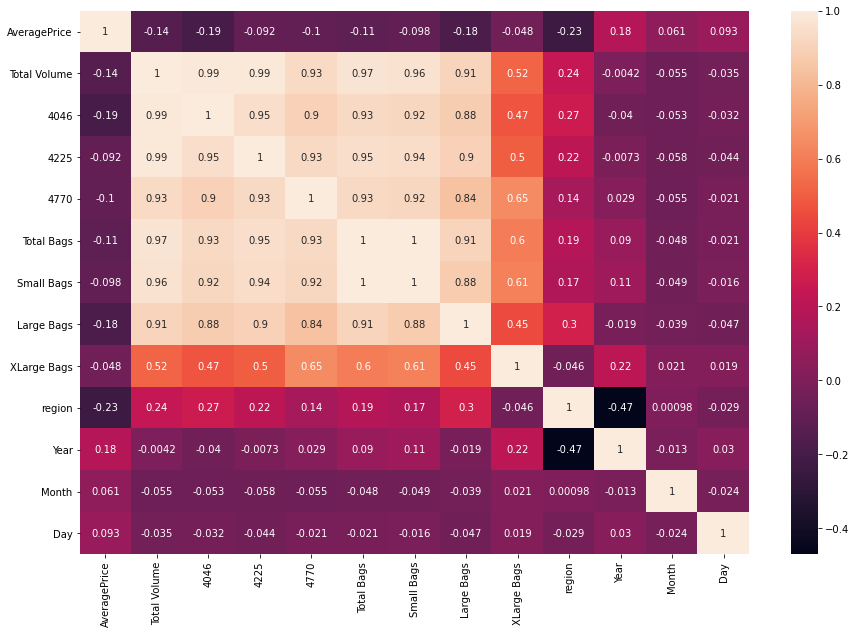

In [81]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

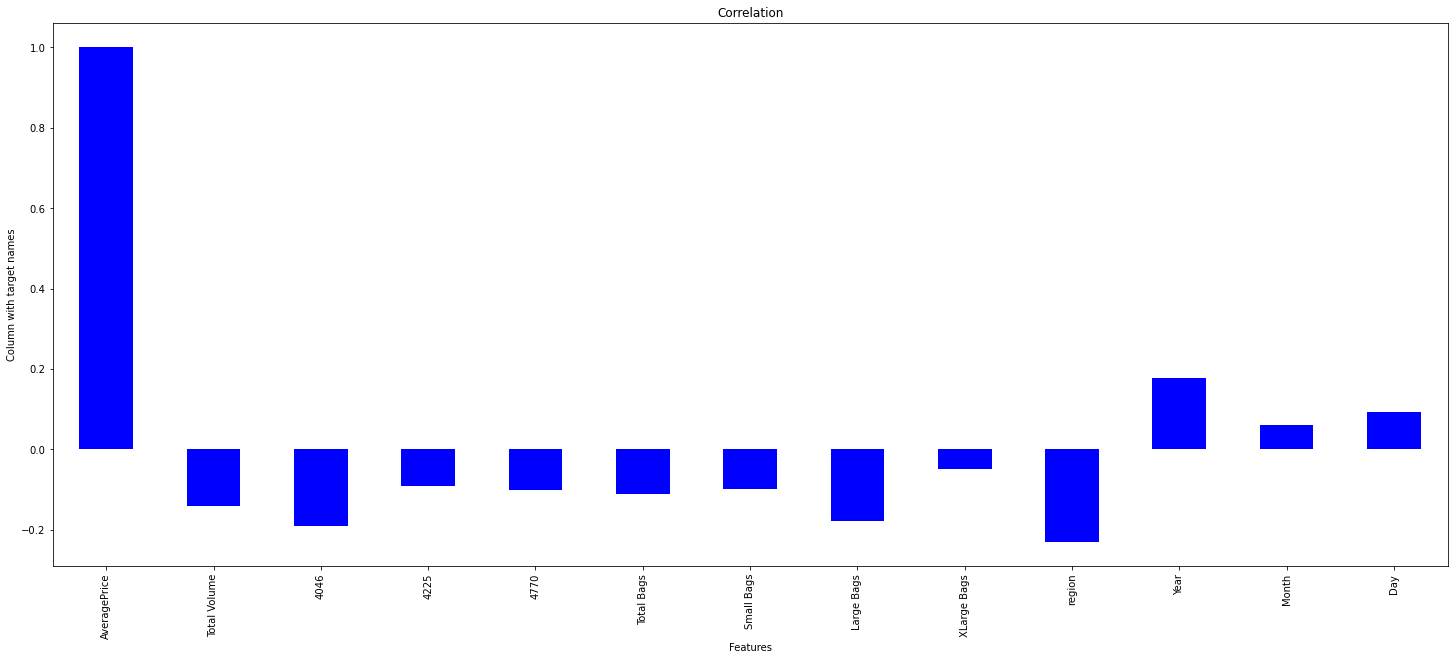

In [82]:
#barplot for correlation
plt.figure(figsize = (25, 10))
df.corr()['AveragePrice'].plot(kind = 'bar', color = 'b')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

1- Total volume, Small bags and and total bags are higly
    correlated

2- Average price and Large, Small bags are higly negative
   correlated

3- Xlarge bags and region are negatively correlated

4- All columns are less correlated with Average price

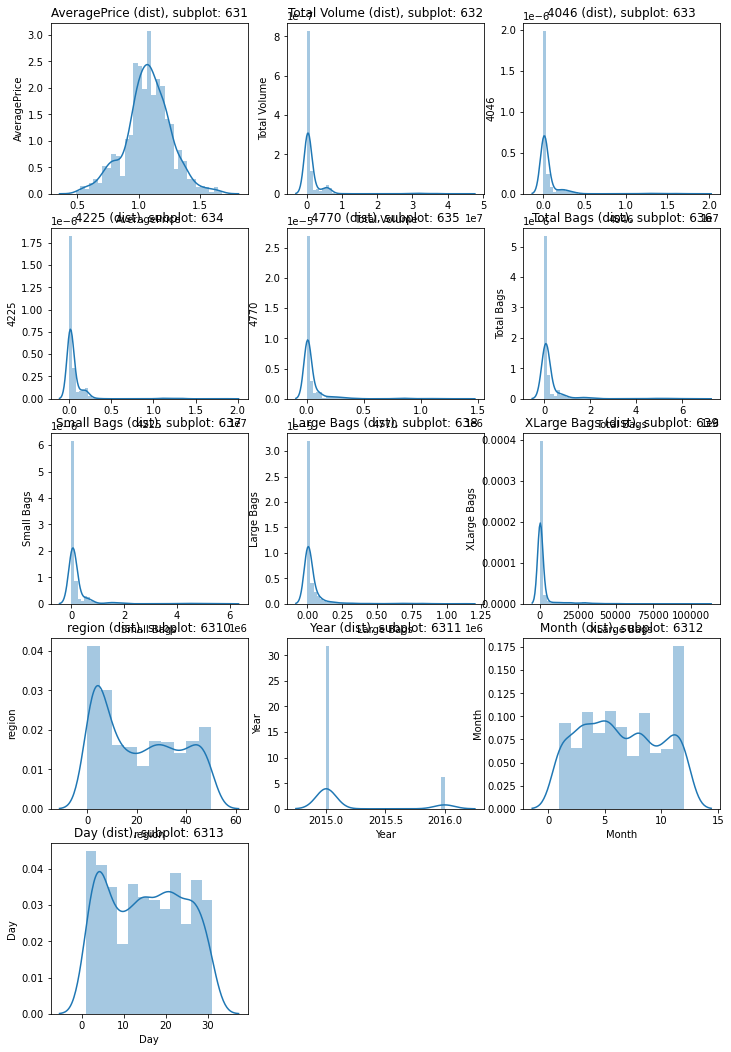

In [83]:
#Distplot for each column
Columns= df.columns

#  plot Numerical Data
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.ylabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()

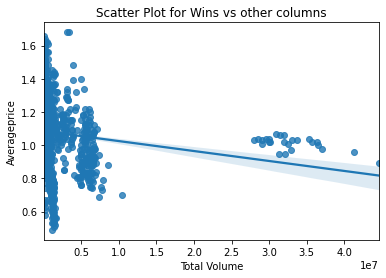

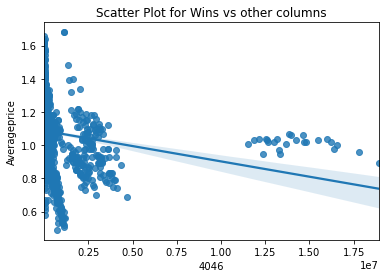

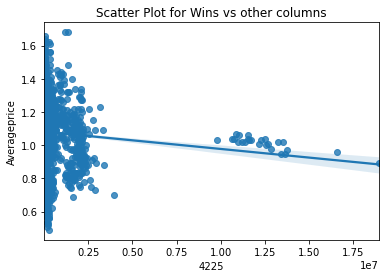

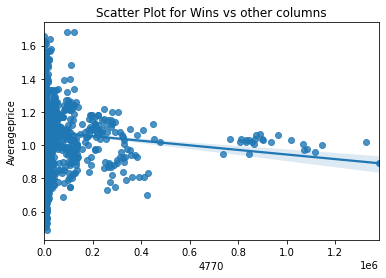

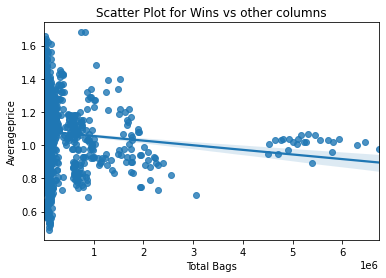

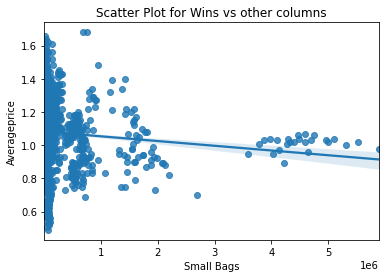

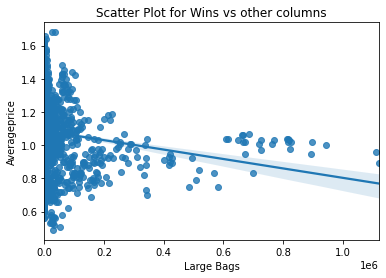

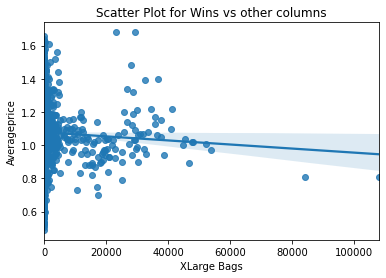

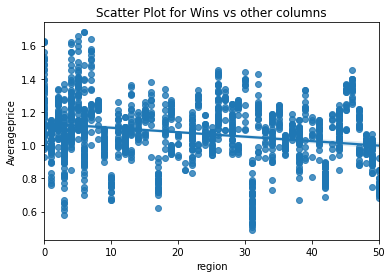

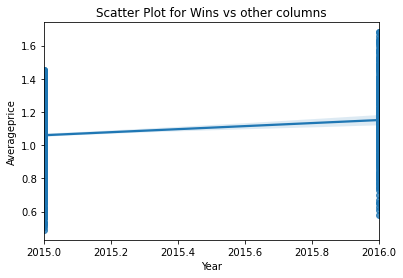

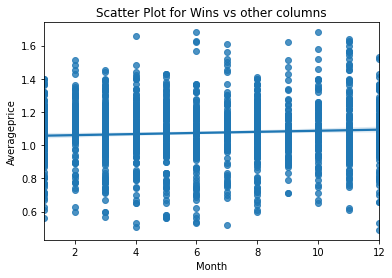

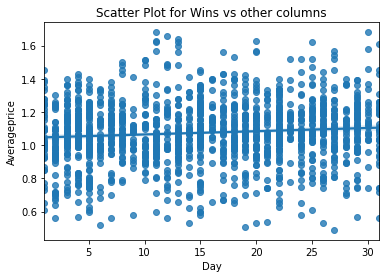

In [84]:
#Checking how W is variated with all columns separately
for i in df.columns[1:]:                                          #bivariate analysis
    plt.figure(figsize = (6, 4))
    sns.regplot(df[i], df['AveragePrice'])
    plt.title('Scatter Plot for Wins vs other columns')
    plt.xlabel(i)
    plt.ylabel('Averageprice')
    plt.show()

1- Due to this columns Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags ther Averageprice decreases.

2- In all regions the Averageprice is almost same.

3- In year 2015-2016 the Averageprice is increased.

4- In days and months the Average price is almost same.

### Mult Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

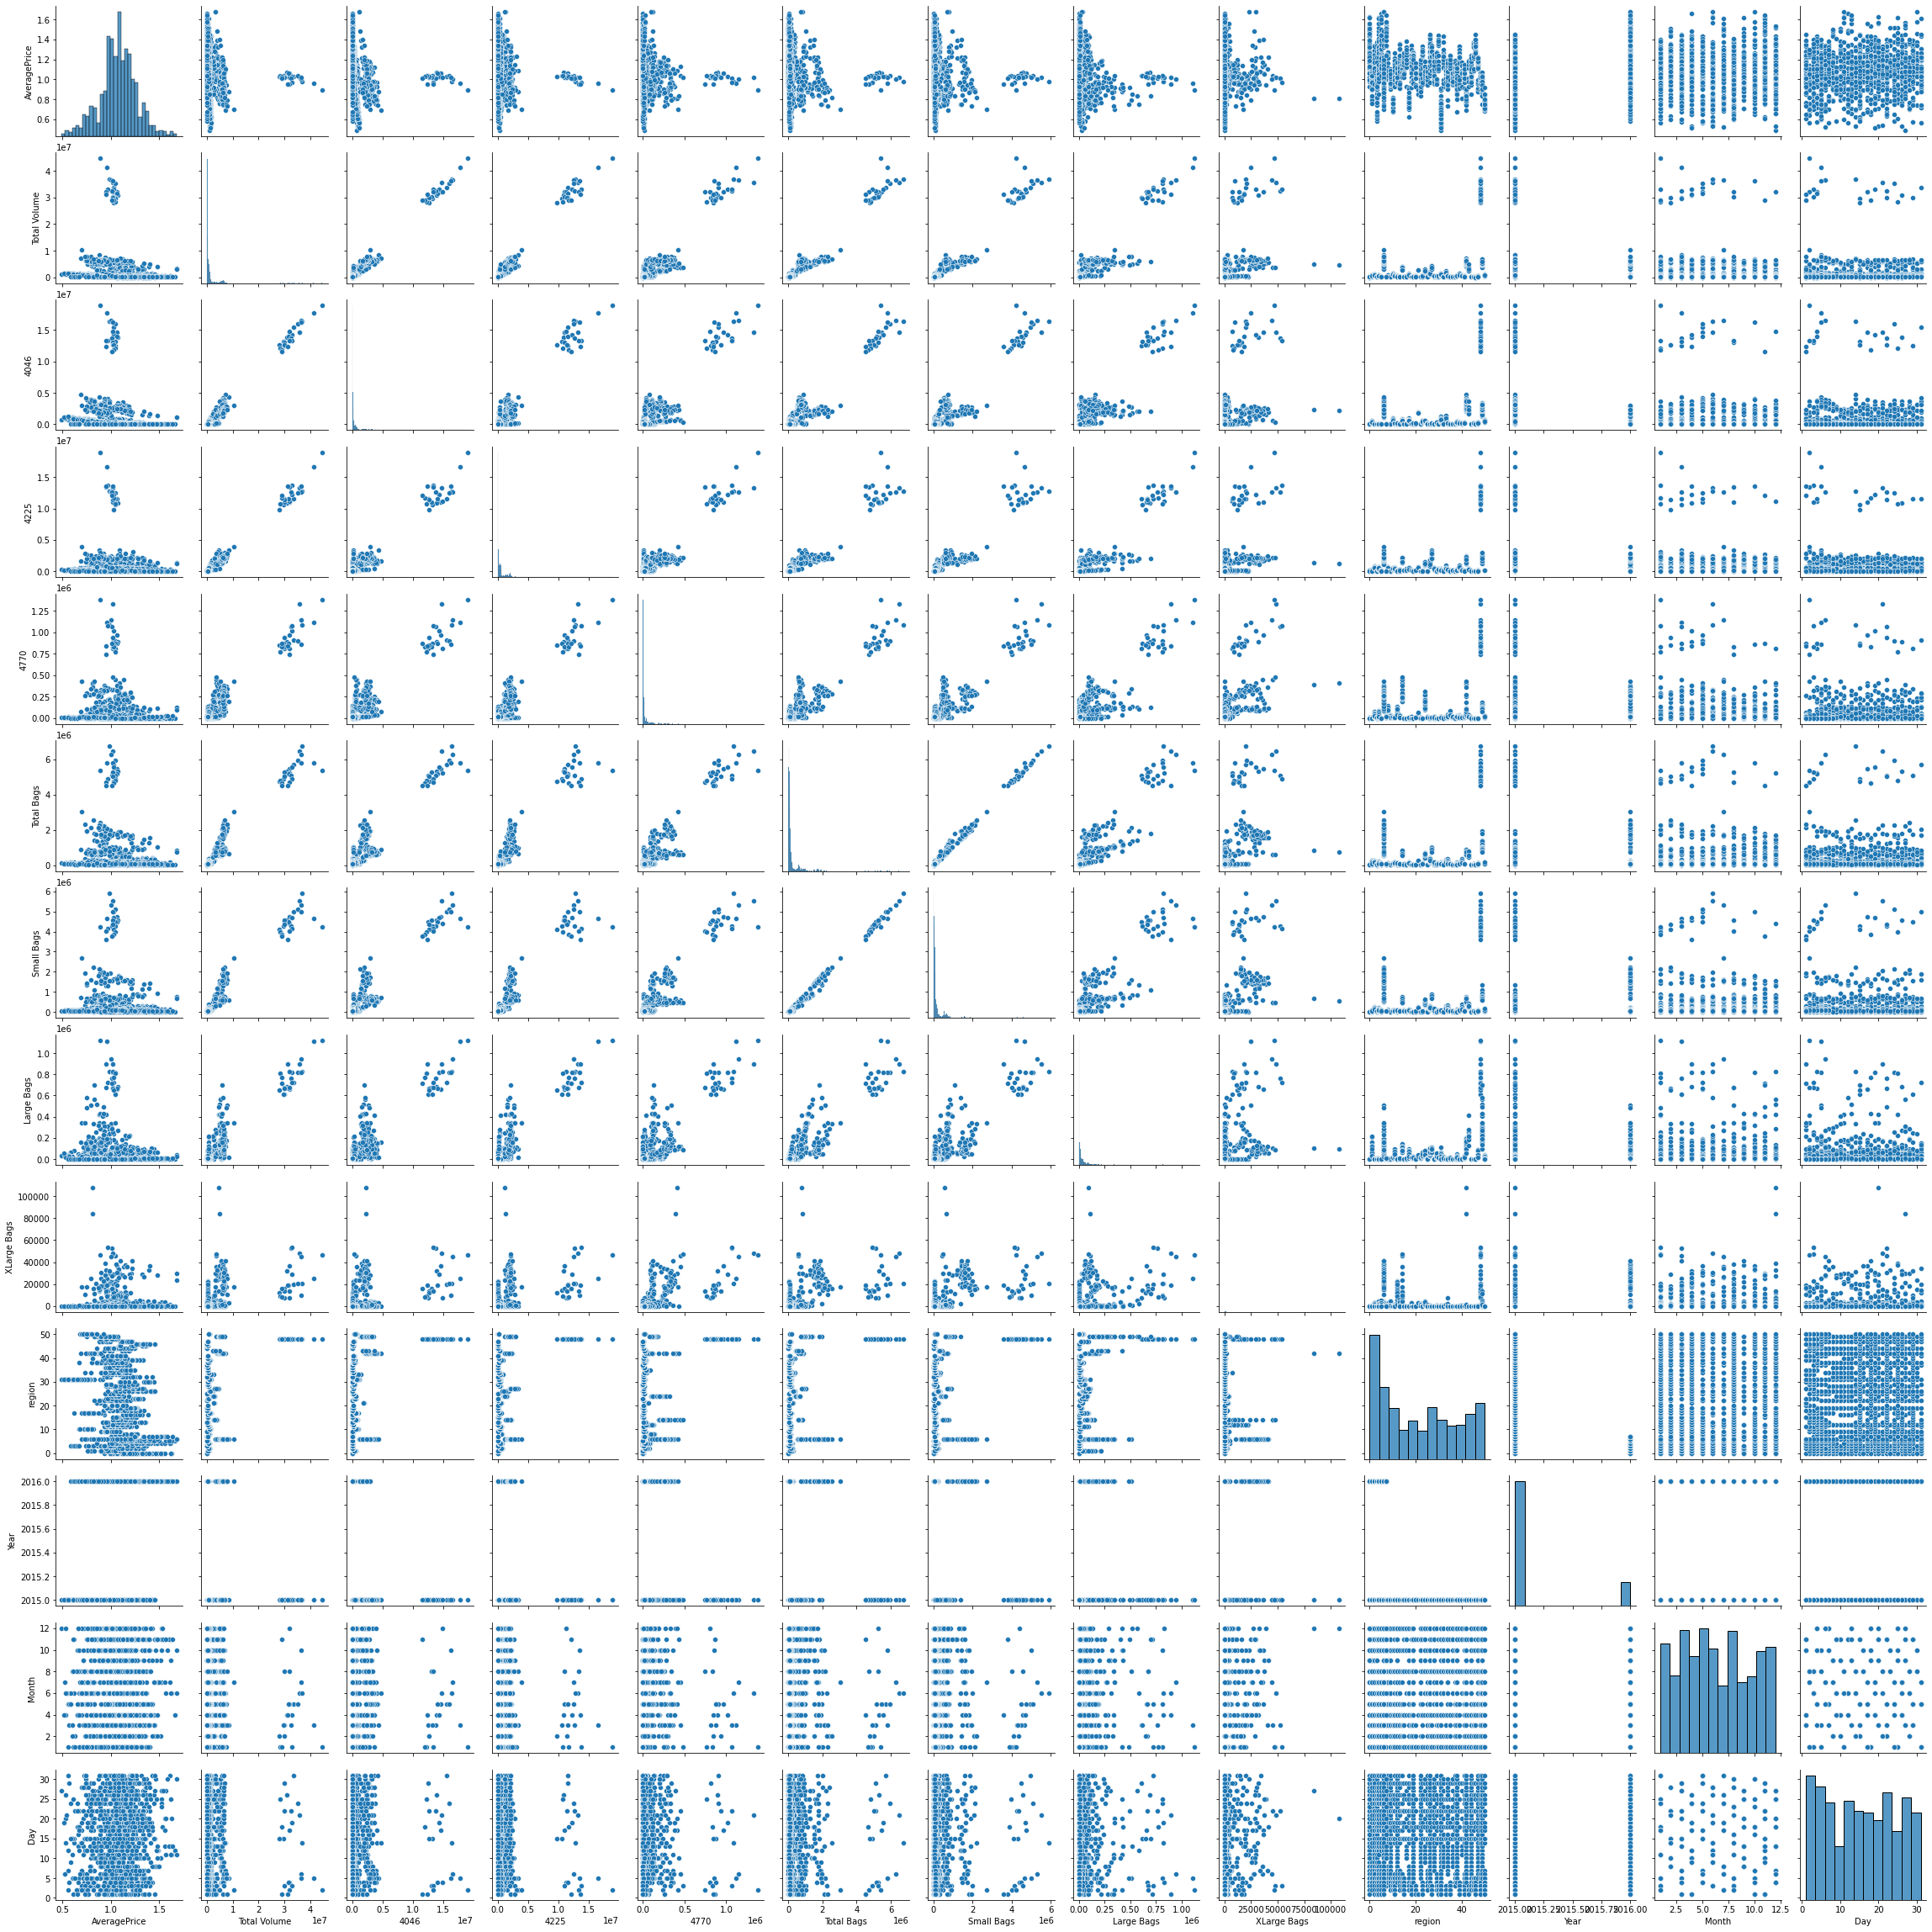

In [85]:
#Checking normal distribution of each column
sns.pairplot(df) 
plt.show

### Checking outliers using Boxplot

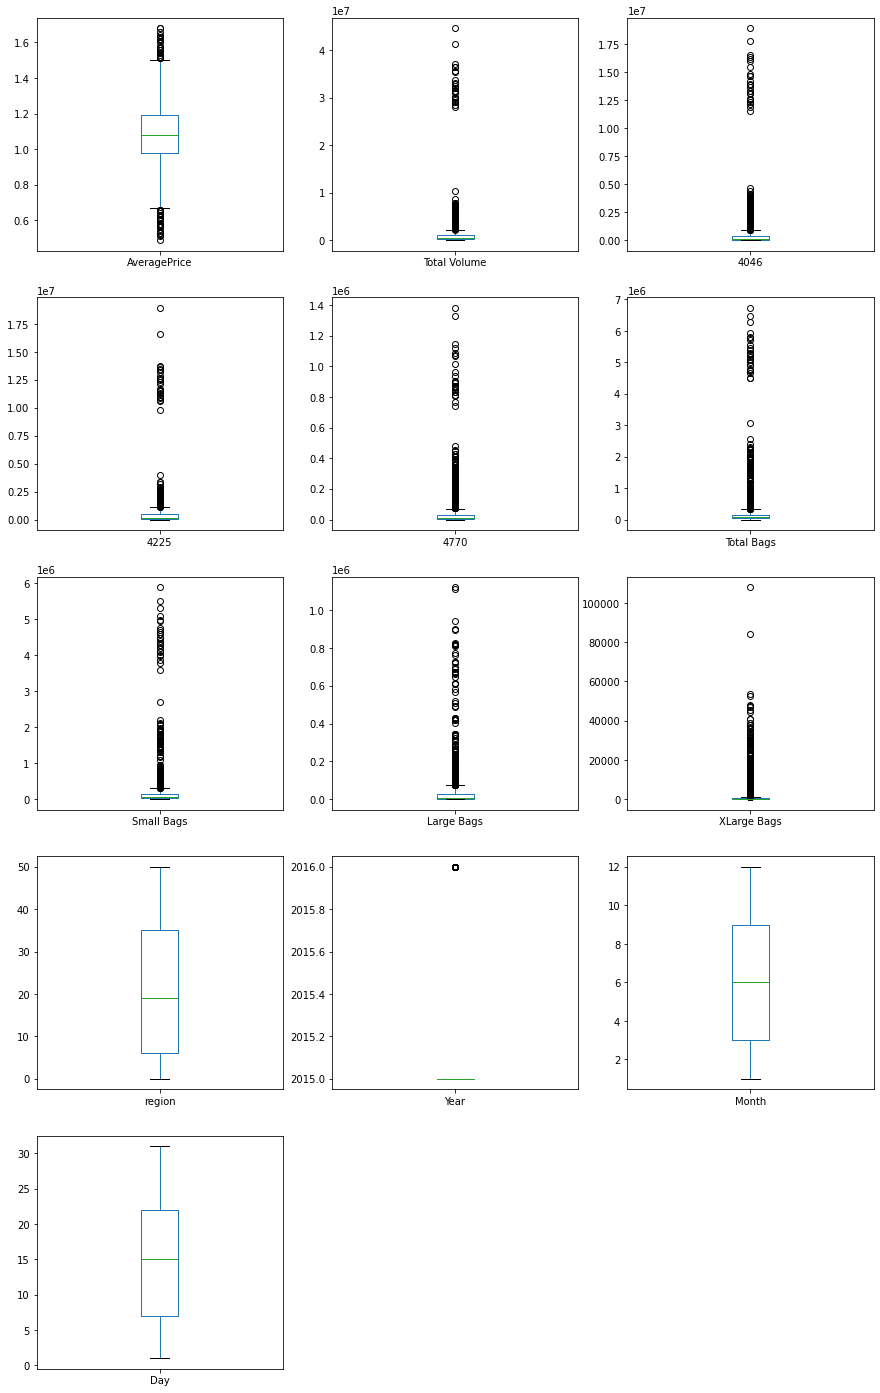

In [86]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,layout=(6,3),figsize=(15,30))
plt.show()

There are lot ofouliers and lets remove ouliers in next step.

### Removing Outliers

In [87]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df))

In [88]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1517, 13)
(1436, 13)


In [89]:
loss_percent=((1517-1436)/1517)*100
loss_percent

5.339485827290705

Here we loss only 5.3% of data, so we remove outliers.

### Checking Skewness

In [90]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
Year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

### Splitting Data in x(independent) and y(dependent)

In [91]:
x = df_new.drop('AveragePrice', axis = 1)
y = df_new['AveragePrice']

In [92]:
#removing skewness
from sklearn.preprocessing import power_transform 
#using yeo-johnson method due to presence of negative skewness
x_new = power_transform(x, method='yeo-johnson')        
x_new = pd.DataFrame(x_new, columns = x.columns)

In [93]:
x_new.skew()

Total Volume    0.000000
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
region         -0.219708
Year            2.004439
Month          -0.136692
Day            -0.212755
dtype: float64

Skewness has been Removed.

In [94]:
#To Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x_new)

In [95]:
#checking shape of x and y
print(x.shape)
print(y.shape)

(1436, 12)
(1436,)


### Checking Best Random State

In [96]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = DecisionTreeRegressor()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    r2 = r2_score(y_test, predLR)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.7494222199863885 on Random State 141


We have found best random_state value as 141. We will create our train_test_split using random_state(141)

## Creating Model

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=141)

In [99]:
models=[LinearRegression(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
        'SVR',
        'DecisionTreeRegressor',
        'KNeighborsRegressor',
        'RandomForestRegressor',
        'AdaBoostRegressor',
        'GradientBoostingRegressor']

r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for i in range(len(models)):
    mod=models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2.append(r2_score(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    
    
d={'Model':model_names,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame

,Model,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.336532,0.121121,0.024310,0.155915
1,SVR,0.763231,0.073948,0.008675,0.093141
2,DecisionTreeRegressor,0.767400,0.066079,0.008523,0.092317
3,KNeighborsRegressor,0.686193,0.085118,0.011498,0.107228
4,RandomForestRegressor,0.825996,0.060055,0.006376,0.079847
5,AdaBoostRegressor,0.622383,0.096127,0.013836,0.117626
6,GradientBoostingRegressor,0.771888,0.070170,0.008358,0.091422


**RandomForestRegressor have bext r2_score and less errors compare to remaining models. But we check Cross_validation_score for best Model.**

### Checking Cross Validation score

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cross=[]
kf = KFold(n_splits=5, random_state=251, shuffle=True)
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=kf)
    cross.append(scr.mean())   
difference={'Model':model_names,'R2_score':r2,"Cross_val_score":cross}
acc_frame=pd.DataFrame(difference)
acc_frame

,Model,R2_score,Cross_val_score
0,LinearRegression,0.336532,0.347613
1,SVR,0.763231,0.727682
2,DecisionTreeRegressor,0.767400,0.681620
3,KNeighborsRegressor,0.686193,0.690456
4,RandomForestRegressor,0.825996,0.817211
5,AdaBoostRegressor,0.622383,0.615376
6,GradientBoostingRegressor,0.771888,0.741860


The difference of R2_score and Cross_validation_score for KNeighborsRegressor is less, but the RandomForestRegressor have less errors compared to other model. So we consider RandomForestRegressor as our best model and performing the hyper Tunning.

### Hyper Tuning the Model

In [101]:
from sklearn.model_selection import GridSearchCV

RFC_parameters={'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50],
             }

In [116]:
RFC=GridSearchCV(RandomForestRegressor(),RFC_parameters,cv=5) #tuning the model

In [117]:
RFC.fit(x_train,y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50]})

In [118]:
RFC.best_params_ #finding the best parameters for tuning

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [119]:
RFC = RandomForestRegressor(bootstrap=False, max_depth=30,min_samples_leaf = 1, min_samples_split= 2,
                            max_features = 'sqrt', n_estimators = 50)
RFC.fit(x_train,y_train)
print("Score=",RFC.score(x_train,y_train))
predrfc = RFC.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,predrfc))
print('Mean squared Error= ', mean_squared_error(y_test,predrfc))
print('Root Mean Absolute Error=', np.sqrt(mean_absolute_error(y_test,predrfc)))
print('\nR2 Score=',r2_score(y_test,predrfc)) 

Score= 0.9999999992341515
Mean Absolute Error=  0.05365877803557618
Mean squared Error=  0.004901159205980924
Root Mean Absolute Error= 0.2316436444964035

R2 Score= 0.8662352716068947


After hypertuning with GridSearchCV the R2 score of our RandomForestRegressor model has increased to 87.

### Lets plot the final Graph for Actual and Predicted output values

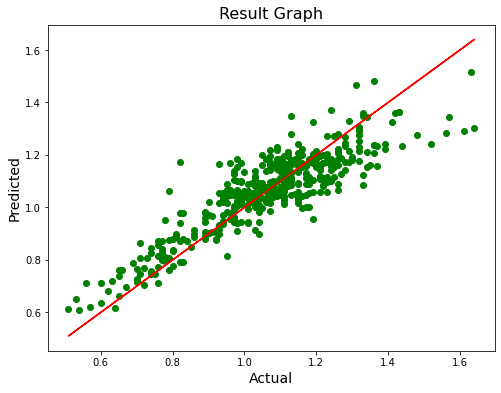

In [120]:
# Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color="g")
plt.plot(y_test,y_test,color="r")
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()

### Saving the model

In [121]:
import pickle, joblib

filename = 'avacado.pkl'
pickle.dump(RFC , open(filename, 'wb'))

## Conclusion

### Loading the Model

In [122]:
RFC=joblib.load('avacado.pkl','rb')
Predicted = RFC.predict(x_test)
Predicted

array([1.0172    , 0.801     , 1.1784    , 1.1668    , 1.1302    ,
       1.1912    , 0.9308    , 1.0536    , 1.0532    , 1.2322    ,
       1.011     , 1.1712    , 1.0434    , 1.1244    , 0.9882    ,
       1.038     , 1.026     , 1.3218    , 1.3154    , 0.7322    ,
       1.0424    , 1.0178    , 0.9888    , 1.282     , 1.027     ,
       0.8222    , 1.1146    , 1.037     , 0.7986    , 1.1306    ,
       1.1106    , 0.9518    , 1.0374    , 1.2512    , 1.1066    ,
       1.2112    , 1.0368    , 1.1244    , 1.18      , 1.0664    ,
       0.9972    , 1.0246    , 0.8408    , 1.197     , 1.141     ,
       1.1208    , 1.0624    , 1.2392    , 0.7796    , 1.4394    ,
       1.1542    , 1.1572    , 1.1016    , 1.069     , 1.1514    ,
       1.0622    , 1.1204    , 1.228     , 0.7098    , 1.1932    ,
       1.0886    , 1.3744    , 0.753     , 1.1692    , 1.035     ,
       1.0126    , 1.2104    , 1.0676    , 0.9034    , 0.6896    ,
       0.9582    , 0.7568    , 1.0994    , 1.0854    , 1.178  

In [123]:
Final=np.array(y_test)
Final

array([1.03, 0.77, 1.15, 1.13, 1.1 , 1.39, 0.93, 1.07, 0.99, 1.16, 0.99,
       1.16, 1.04, 1.11, 0.97, 1.03, 1.03, 1.29, 1.24, 0.76, 1.01, 1.03,
       0.94, 1.13, 1.01, 0.79, 1.1 , 1.02, 0.8 , 1.17, 1.18, 1.04, 0.99,
       1.27, 1.1 , 1.15, 1.01, 1.11, 1.08, 1.09, 0.94, 0.95, 0.8 , 1.05,
       1.13, 1.15, 1.07, 1.29, 0.76, 1.61, 1.14, 1.11, 1.21, 0.93, 1.23,
       1.09, 1.1 , 1.19, 0.74, 1.26, 1.11, 1.26, 0.78, 1.16, 1.02, 0.98,
       1.23, 1.17, 0.9 , 0.72, 0.99, 0.75, 1.1 , 0.96, 1.19, 0.8 , 1.17,
       0.99, 1.23, 1.3 , 1.32, 1.24, 1.21, 0.95, 1.06, 0.71, 1.12, 0.79,
       1.03, 1.21, 1.08, 1.01, 0.73, 1.13, 1.23, 1.13, 1.32, 0.62, 0.98,
       1.05, 1.28, 1.11, 1.22, 1.33, 1.01, 1.19, 0.76, 1.22, 1.24, 0.63,
       1.01, 1.52, 1.09, 1.23, 1.19, 0.91, 1.13, 1.08, 1.01, 1.04, 1.13,
       1.07, 1.11, 0.53, 1.18, 1.34, 1.2 , 0.99, 1.08, 1.36, 1.07, 1.13,
       1.07, 1.07, 1.11, 1.13, 1.19, 1.56, 0.7 , 1.12, 0.86, 0.92, 1.32,
       1.04, 0.8 , 1.16, 1.24, 0.86, 1.14, 1.44, 1.

In [124]:
predict=np.array(RFC.predict(x_test))
predict

array([1.0172    , 0.801     , 1.1784    , 1.1668    , 1.1302    ,
       1.1912    , 0.9308    , 1.0536    , 1.0532    , 1.2322    ,
       1.011     , 1.1712    , 1.0434    , 1.1244    , 0.9882    ,
       1.038     , 1.026     , 1.3218    , 1.3154    , 0.7322    ,
       1.0424    , 1.0178    , 0.9888    , 1.282     , 1.027     ,
       0.8222    , 1.1146    , 1.037     , 0.7986    , 1.1306    ,
       1.1106    , 0.9518    , 1.0374    , 1.2512    , 1.1066    ,
       1.2112    , 1.0368    , 1.1244    , 1.18      , 1.0664    ,
       0.9972    , 1.0246    , 0.8408    , 1.197     , 1.141     ,
       1.1208    , 1.0624    , 1.2392    , 0.7796    , 1.4394    ,
       1.1542    , 1.1572    , 1.1016    , 1.069     , 1.1514    ,
       1.0622    , 1.1204    , 1.228     , 0.7098    , 1.1932    ,
       1.0886    , 1.3744    , 0.753     , 1.1692    , 1.035     ,
       1.0126    , 1.2104    , 1.0676    , 0.9034    , 0.6896    ,
       0.9582    , 0.7568    , 1.0994    , 1.0854    , 1.178  

In [125]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))
df_pred

,original,predicted
0,1.03,1.0172
1,0.77,0.8010
2,1.15,1.1784
3,1.13,1.1668
4,1.10,1.1302
...,...,...
426,1.15,1.2668
427,0.93,1.0610
428,0.93,1.0498
429,1.43,1.3756


We have used RandomForestRegressor in this dataset and achieve the accuracy score.It is also used for predicting the Averageprice of the Avacado.